# Aufgabe zur Fehlerfortpflanzung 

Technische Universität Berlin, Straße des 17. Juni 135, 10623 Berlin, Deutschland

---

**Clarissa Pinheiro** (Kurs 348T)

E-mail: cvpinheiro13@gmail.com

**Sofía Rodríguez** (Kurs 348T)

E-mail: sofiaerb@hotmail.com

**Vasu Seghal** (Kurs 348T)

E-mail: vasusehgal10611@gmail.com 

**Allan A. Zea** (Kurs 348T)

E-mail: zealobo@campus.tu-berlin.de

---

Eine kleine Kugel wird auf einer Kreisbahn mit konstanter Winkelbeschleunigung $\epsilon$ beschleunigt. Zur Zeit $t=0$ befindet sie sich unter dem Winkel $\phi_0$ im Punkt (0) und hat hier die Winkelgeschwindigkeit $\omega_0$. Es wurde gemessen:

$$\ddot{\phi}(0)=\epsilon\pm\Delta\epsilon=\left(\frac{\pi}{2}\pm0\right)s^{-2}$$

$$\dot{\phi}(0)=\omega_0\pm\Delta\omega_0=\left(\frac{\pi}{2}\pm0,05\right)s^{-1}$$

$$\phi(0)=\phi_0\pm\Delta\phi_0=\left(\frac{\pi}{6}\pm0,01\right)$$


Stellen Sie die Bewegungsgleichungen auf und zeigen Sie, dass der Winkel $\phi_1 = 2\pi$ nach der Zeit

In [8]:
library(scales)
library(ggplot2)

fp_tabelle <- t(read.csv('Daten/federpendelmess.csv', header = TRUE, sep = ","))
str(fp_tabelle) 
head(fp_tabelle) 

 num [1:11, 1:4] 0.05 9.72 10.49 10.1 9.98 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:11] "Masse.kg" "T30.1" "T30.2" "T30.3" ...
  ..$ : NULL


Masse.kg,0.05,0.15,0.20,0.30
T30.1,9.72,13.32,16.45,18.83
T30.2,10.49,14.71,15.16,18.69
T30.3,10.10,14.00,15.59,18.83
T30.4,9.98,13.84,15.68,17.96
T30.5,10.34,13.94,15.70,19.02


ohne die fehlenden Werte (sog. 'NA') mit zu berücksichtigen

In [2]:
fp_tabelle[(which(fp_tabelle[2:11,1] != 'NA')+1), 1]

T30.1 T30.2 T30.3 T30.4 T30.5 T30.6 T30.7 
 9.72 10.49 10.10  9.98 10.34 10.00 10.00

Jetzt sind wir in der Lage, die Länge, den Mittelwert und die Standardabweichung für jeden dieser Versuche zu ermitteln.

In [9]:
laenge <- c()
mittelwerte <- c()
standard_abweichungen <- c()

for (k in 1:4) { 
  messungen <- c(fp_tabelle[(which(fp_tabelle[2:11, k] != 'NA')+1), k])
  laenge <- c(laenge, length(messungen))
  mittelwerte <- c(mittelwerte, mean(messungen))
  standard_abweichungen <- c(standard_abweichungen, sd(messungen))
}

In [20]:
mittelwerte <- mittelwerte / 30
standard_abweichungen <- standard_abweichungen / 30

fehler_mittel <- standard_abweichungen / laenge
rel_fehler <- fehler_mittel / mittelwerte

cat("\n Mittelwerte: ", mittelwerte, sep = "  ")
cat("\n Standardabweichungen: ", standard_abweichungen, sep = "  ")
cat("\n Fehler der Mittelwerte: ", fehler_mittel, sep = "  ")
cat("\n Relative Fehler: ", percent(rel_fehler), sep = "  ")


 Mittelwerte:   0.0003737037  0.0005145503  0.0005821296  0.0006916667
 Standardabweichungen:   9.415958e-06  1.60727e-05  1.431669e-05  1.562033e-05
 Fehler der Mittelwerte:   1.345137e-06  2.2961e-06  1.789586e-06  1.562033e-06
 Relative Fehler:   0.360%  0.446%  0.307%  0.226%

In [58]:
2*rel_fehler*(periode)
percent(2*rel_fehler*(mittelwerte^2)/periode)

[1] 1.005365e-09 2.362918e-09 2.083543e-09 2.160813e-09

[1] "0.720%" "0.892%" "0.615%" "0.452%"

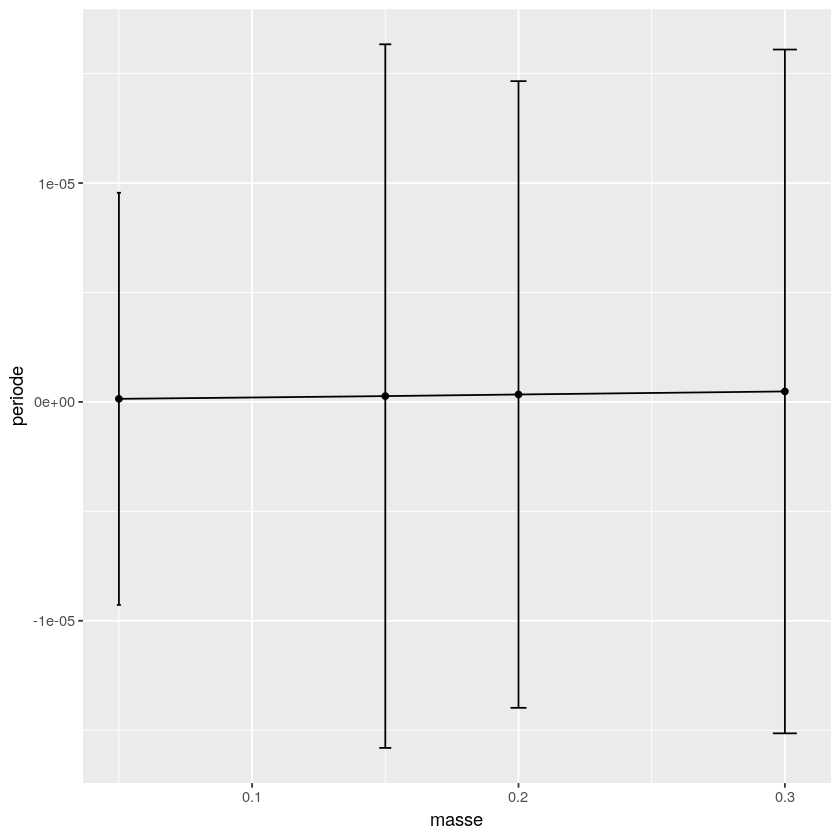

In [78]:
df <- data.frame(masse = c(0.05, 0.15, 0.20, 0.30), periode = mittelwerte^2)

p <- ggplot(df, aes(x = masse, y = periode)) + 
     geom_line() + 
     geom_point() +
     geom_errorbar(aes(ymin = periode - standard_abweichungen, 
                       ymax = periode + standard_abweichungen),
                   width = 0.03*c(0.05, 0.15, 0.20, 0.30))

print(p)

---